# Objective:

The goal of the "InstaCart Market Basket Analysis" is to predict which item and/or product will be next in future for user to buy.

Citation: "The Instacart Online Grocery Shopping Dataset 2017”, Accessed from https://www.instacart.com/datasets/grocery-shopping-2017"

In [2]:
#imports Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
#from mlxtend.frequent_patterns import apriori
#from mlxtend.frequent_patterns import association_rules

In [3]:
#import Dataset
train_df = pd.read_csv("data/order_products__train.csv")
prior_df = pd.read_csv("data/order_products__prior.csv")
aisles_df = pd.read_csv("data/aisles.csv")
orders_df = pd.read_csv("data/orders.csv")
departments_df = pd.read_csv("data/departments.csv")
products_df =  pd.read_csv("data/products.csv")

# EDA
Before we dive deep into EDA(Exploratory Data Analysis), Let's check what each dataset consists of.

In [92]:
train_df.tail()

,order_id,product_id,add_to_cart_order,reordered
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1
1384616,3421070,4724,3,1


In [91]:
prior_df.tail()

,order_id,product_id,add_to_cart_order,reordered
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1
32434488,3421083,5020,10,1


In [102]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64


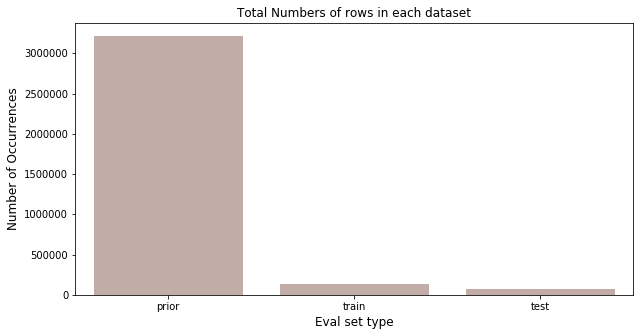

In [29]:
count = orders_df.eval_set.value_counts()
print(count)
#print(count.index,count.values)
plt.figure(figsize=(10,5))
sns.barplot(count.index,count.values,alpha=0.5,color = color[5])
plt.title("Total Numbers of rows in each dataset")
plt.ylabel('Number of Occurrences',fontsize=12)
plt.xlabel('Eval set type',fontsize=12)
plt.show()

In [16]:
def get_unique(x):
    return len(np.unique(x))

count = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique)
count

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

Here we can see that from total 20620 customers, We are provided to use 131209 data of the customers to build the model and 
can use 75000 Test Data to apply on built model to get the resulted ouput.

Now, Lets check how many orders are being placed(minimum and maximum orders). Additionally, Lets check how much time the 
occurance of same type of orders.

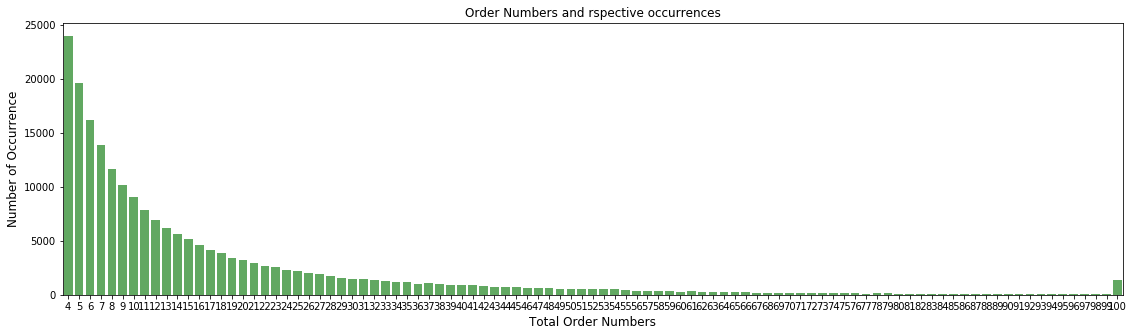

In [57]:
# To check per user what was the maximum order placed
count = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
count
count = count.order_number.value_counts()
plt.figure(figsize=(19,5))
sns.barplot(count.index,count.values,alpha = 0.8,color = color[2])
plt.xlabel("Total Order Numbers",fontsize = 12)
plt.ylabel("Number of Occurrence",fontsize = 12)
plt.title("Order Numbers and rspective occurrences")
plt.show()


It is observed that there are no orders less than 4 and more than 100.

Now lets proceed towards the behavoir of the order numbers during varous day of the week.

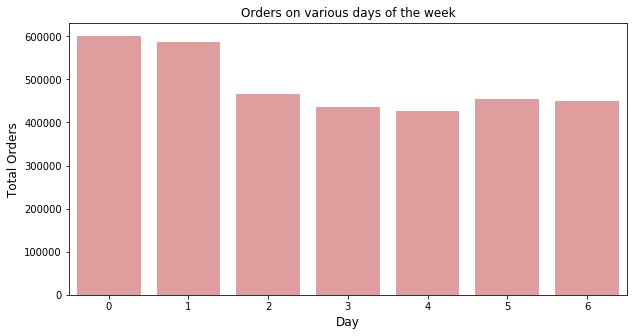

In [61]:
count = orders_df.order_dow.value_counts()
count
plt.figure(figsize=(10,5))
sns.barplot(count.index,count.values,alpha = 0.5,color = color[3])
plt.xlabel("Day",fontsize = 12)
plt.ylabel("Total Orders",fontsize = 12)
plt.title("Orders on various days of the week")
plt.show()

It shows that on Saturday and Sunday i.e. on 0 and 1 orders are high and on on Wednesday ordersa re super low.

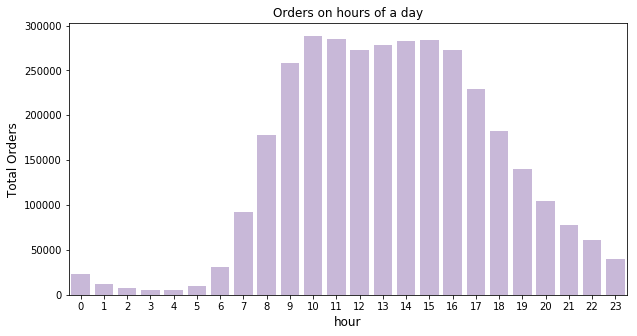

In [64]:
plt.figure(figsize=(10,5))
sns.countplot(x="order_hour_of_day",data= orders_df,alpha = 0.5,color = color[4])
plt.xlabel("hour",fontsize = 12)
plt.ylabel("Total Orders",fontsize = 12)
plt.title("Orders on hours of a day")
plt.show()

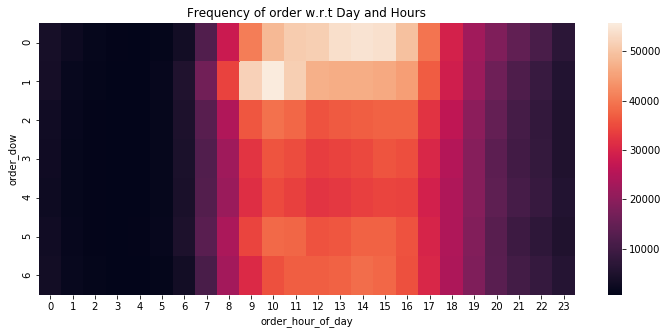

In [70]:
grp_df =  orders_df.groupby(["order_dow","order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grp_df = grp_df.pivot("order_dow","order_hour_of_day","order_number")
plt.figure(figsize=(12,5))
sns.heatmap(grp_df)
plt.title("Frequency of order w.r.t Day and Hours")
plt.show()

Here we can see that Saturday noon/afternoons and Sunday Mornings are pretty good time for orders to be made.
Now, Lets check the time interval between the orders.

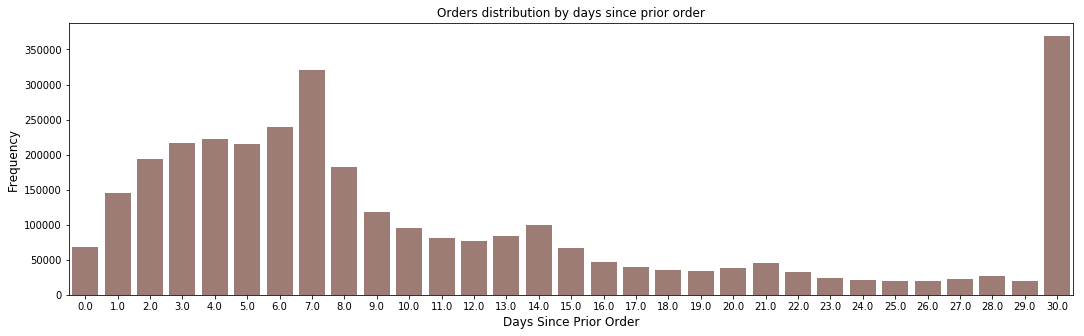

In [78]:
orders_df.head()
plt.figure(figsize=(18,5))
sns.countplot(x="days_since_prior_order",data= orders_df,alpha = 0.8,color = color[5])
plt.xlabel("Days Since Prior Order",fontsize = 12)
plt.ylabel("Frequency",fontsize = 12)
plt.title("Orders distribution by days since prior order")
plt.show()

It shows that cx orders once in a week and once in a month. check the results at 7th,14th,21th days and at the end of the month .i.e on 30th day.

In [89]:
#checking the reorders of prior set
reords = prior_df.reordered.value_counts()/prior_df.shape[0]
reords


1    0.589697
0    0.410303
Name: reordered, dtype: float64

In [88]:
#checking the reorders of train set
avg_reords =  train_df.reordered.sum()/train_df.shape[0]
avg_reords

0.5985944127509629

uptill now, reordered and non ordered products perecentage is analyzed. We will check now how many percentage of the orders
are there when none of the products are re-ordered

In [107]:
grped_df = train_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grped_df["reordered"].loc[grped_df["reordered"]>1] = 1
grped_df.reordered.value_counts()/grped_df.shape[0]

1    0.93444
0    0.06556
Name: reordered, dtype: float64

In [108]:
grped_df = prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grped_df["reordered"].loc[grped_df["reordered"]>1] = 1
grped_df.reordered.value_counts()/grped_df.shape[0]

1    0.879151
0    0.120849
Name: reordered, dtype: float64

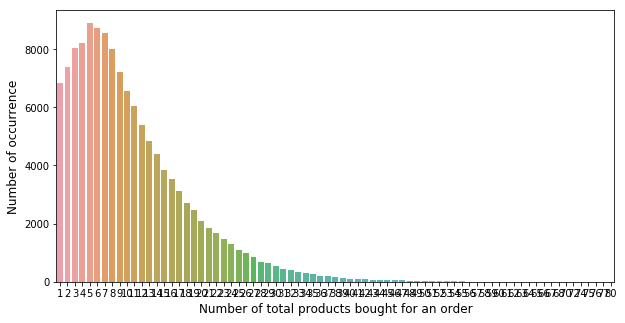

In [118]:
prds = train_df.groupby("order_id")["product_id"].aggregate("count").reset_index()
prds = prds.product_id.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(prds.index,prds.values,alpha = 0.9)
plt.xlabel("Number of total products bought for an order",fontsize = 12)
plt.ylabel("Number of occurrence",fontsize = 12)
plt.show()

It shows that most of the people bougth 5 products together in one order id(check the peak at 
app.9000)
Now lets merge products_df, aisles_df and department_df with prior_df to increase the features.

In [4]:
prior_df = pd.merge(prior_df,products_df,on='product_id',how='left')
prior_df = pd.merge(prior_df,aisles_df,on='aisle_id',how='left')
prior_df = pd.merge(prior_df,departments_df,on='department_id',how='left')
prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [ ]:
count = prior_df.product_name.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(count.index,count.values,alpha = 0.9)
plt.xlabel("Number of total products bought for an order",fontsize = 12)
plt.ylabel("Number of occurrence",fontsize = 12)
plt.show()